In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [4]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report
from sklearn.metrics import confusion_matrix

In [5]:
from wordcloud import WordCloud

In [6]:
df_train=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\my projects\\anonymous\\datasets\\sentiment\\train.txt",delimiter=';',names=['text','label'])
df_val=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\my projects\\anonymous\\datasets\\sentiment\\val.txt",delimiter=';',names=['text','label'])

In [7]:
df = pd.concat([df_train,df_val])
df.reset_index(inplace=True,drop=True)

In [8]:
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18000 non-null  object
 1   label   18000 non-null  object
dtypes: object(2)
memory usage: 281.4+ KB


In [10]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [11]:
df.duplicated().sum()

1

In [12]:
df.shape

(18000, 2)

In [13]:
print(df.dtypes)

text     object
label    object
dtype: object


joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: label, dtype: int64
joy         33.700000
sadness     28.977778
anger       13.522222
fear        11.938889
love         8.233333
surprise     3.627778
Name: label, dtype: float64


<Axes: >

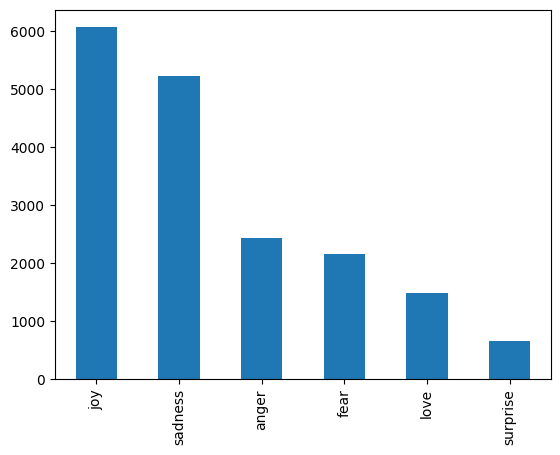

In [14]:
print(df['label'].value_counts())
print((df['label'].value_counts()/df['label'].count())*100)
df['label'].value_counts().plot(kind='bar')

In [15]:
def custom_encoder(df):
    df.replace(to_replace ="surprise", value =1, inplace=True)
    df.replace(to_replace ="love", value =1, inplace=True)
    df.replace(to_replace ="joy", value =1, inplace=True)
    df.replace(to_replace ="fear", value =0, inplace=True)
    df.replace(to_replace ="anger", value =0, inplace=True)
    df.replace(to_replace ="sadness", value =0, inplace=True)
custom_encoder(df['label'])

In [16]:
df_test=pd.read_csv("C:\\Users\\Dell\\OneDrive\\Desktop\\my projects\\anonymous\\datasets\\sentiment\\test.txt",delimiter=';',names=['text','label'])

<Axes: >

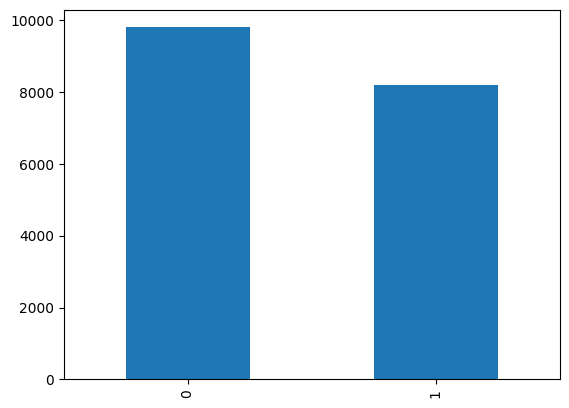

In [17]:
df['label'].value_counts().plot(kind='bar')

In [18]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus

In [19]:
corpus = text_transformation(df['text'])

In [20]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df.label

In [21]:
X_test,y_test = df_test.text,df_test.label
#encode the labels into two classes , 0 and 1
df_test = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)



In [22]:
rf = RandomForestClassifier()
rf.fit(X,y)
predictions = rf.predict(testdata)

In [23]:
#plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

Accuracy_score:  0.9585
Precision_score:  0.9524324324324325
Recall_score:  0.9576086956521739
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1080
           1       0.95      0.96      0.96       920

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

